In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.ensemble as ens
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report


In [3]:
df = pd.read_csv(r'C:\Users\Chinmay\Desktop\AAI\FinalProject- Applied ML\wildfire-main\wildfire-main\data\training\train_data.csv')


In [4]:
#dir(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356000 entries, 0 to 355999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   grid_id           356000 non-null  int64  
 1   date              356000 non-null  object 
 2   eto               307569 non-null  float64
 3   precipitation     347348 non-null  float64
 4   solar_rad         346322 non-null  float64
 5   aver_vapor_press  346614 non-null  float64
 6   max_air_temp      345830 non-null  float64
 7   min_air_temp      345666 non-null  float64
 8   aver_air_temp     346010 non-null  float64
 9   max_humidity      346903 non-null  float64
 10  min_humidity      346903 non-null  float64
 11  aver_humidity     341796 non-null  float64
 12  dew_point         341795 non-null  float64
 13  aver_wind_speed   347263 non-null  float64
 14  wind_run          347185 non-null  float64
 15  soil_temp         341369 non-null  float64
 16  has_fire          35

In [5]:
df.drop(['date','grid_id','eto','min_air_temp','min_humidity','precipitation'], axis=1, inplace= True)
df.head()

,solar_rad,aver_vapor_press,max_air_temp,aver_air_temp,max_humidity,aver_humidity,dew_point,aver_wind_speed,wind_run,soil_temp,has_fire
0,148.0,7.9,55.5,44.1,92.0,80.0,38.5,3.2,78.2,49.1,0
1,269.0,7.1,58.4,42.6,93.0,76.0,35.6,3.9,93.8,48.8,0
2,275.0,6.9,60.4,41.7,92.0,77.0,35.0,3.2,77.1,48.2,0
3,268.0,7.0,65.7,43.5,93.0,73.0,35.5,2.5,61.0,47.8,0
4,217.0,8.8,60.1,45.0,94.0,87.0,41.2,3.3,80.4,47.7,0


In [6]:
#Filling null values with the mean value

df.solar_rad.fillna(df.solar_rad.mean(), inplace = True)
df.aver_vapor_press.fillna(df.aver_vapor_press.mean(), inplace = True)
df.max_air_temp.fillna(df.max_air_temp.mean(), inplace = True)
df.aver_air_temp.fillna(df.aver_air_temp.mean(), inplace = True)
df.max_humidity.fillna(df.max_humidity.mean(), inplace = True)
df.aver_humidity.fillna(df.aver_humidity.mean(), inplace = True)
df.dew_point.fillna(df.dew_point.mean(), inplace = True)
df.aver_wind_speed.fillna(df.aver_wind_speed.mean(), inplace = True)
df.wind_run.fillna(df.wind_run.mean(), inplace = True)
df.soil_temp.fillna(df.soil_temp.mean(), inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356000 entries, 0 to 355999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   solar_rad         356000 non-null  float64
 1   aver_vapor_press  356000 non-null  float64
 2   max_air_temp      356000 non-null  float64
 3   aver_air_temp     356000 non-null  float64
 4   max_humidity      356000 non-null  float64
 5   aver_humidity     356000 non-null  float64
 6   dew_point         356000 non-null  float64
 7   aver_wind_speed   356000 non-null  float64
 8   wind_run          356000 non-null  float64
 9   soil_temp         356000 non-null  float64
 10  has_fire          356000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 29.9 MB


In [8]:
df.describe()

,solar_rad,aver_vapor_press,max_air_temp,aver_air_temp,max_humidity,aver_humidity,dew_point,aver_wind_speed,wind_run,soil_temp,has_fire
count,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000,356000.000000
mean,448.961785,10.164375,73.898247,58.986736,78.997411,54.925472,39.855725,4.510734,108.461341,60.969322,0.005323
std,186.413525,165.125189,15.645449,14.087586,18.996269,22.195126,13.373778,4.036750,54.778480,11.786891,0.072765
min,-27.000000,0.000000,9.100000,-22.700000,0.000000,0.000000,-83.700000,-1982.577778,0.000000,28.800000,0.000000
25%,296.000000,5.900000,63.200000,50.266667,69.000000,36.000000,31.400000,3.050000,73.300000,52.800000,0.000000
50%,448.961785,9.133333,73.000000,58.800000,85.000000,54.925472,40.800000,4.000000,96.200000,60.969322,0.000000
75%,607.000000,12.400000,85.200000,67.800000,94.000000,74.000000,50.000000,5.300000,127.400000,69.840000,0.000000
max,1261.444444,47990.000000,442.600000,115.400000,100.000000,100.000000,79.275000,31.700000,760.800000,102.500000,1.000000


In [9]:
#defining the dependent and independent data 

X = df[['solar_rad','aver_vapor_press','max_air_temp','aver_air_temp', 
              'max_humidity','aver_humidity','dew_point','aver_wind_speed','wind_run','soil_temp']] 
y = df['has_fire']


In [12]:
#Under sampling the imbalanced data

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
y_resampled

0       0
1       0
2       0
3       0
4       0
       ..
3785    1
3786    1
3787    1
3788    1
3789    1
Name: has_fire, Length: 3790, dtype: int64

In [15]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,
                                                        stratify=y_resampled,
                                                        random_state=42)

#Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
    
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [16]:
len(y_test[y_test== 1])

568

In [17]:
#Using Random Forest model for classification
rf_model = RandomForestClassifier(n_estimators = 500)

#from imblearn.ensemble import BalancedRandomForestClassifier
#rf_model = BalancedRandomForestClassifier(n_estimators=100,random_state=0)

In [18]:
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500)

In [19]:
rf_prediction = rf_model.predict(X_test)

In [28]:
#Creating confusion matrix
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, rf_prediction )
print("clasification report: \n ",classification_report(y_test,rf_prediction))

clasification report: 
                precision    recall  f1-score   support

           0       0.78      0.78      0.78       569
           1       0.78      0.79      0.78       568

    accuracy                           0.78      1137
   macro avg       0.78      0.78      0.78      1137
weighted avg       0.78      0.78      0.78      1137



<AxesSubplot:>

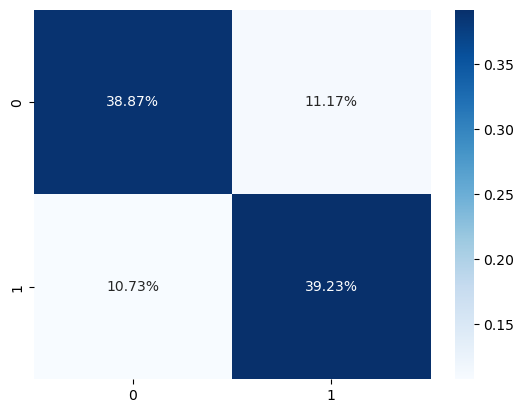

In [29]:
import seaborn as sns
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, #Plotting confusion matrix
            fmt='.2%', cmap='Blues')

In [30]:
rf_has_fire_prediction = np.sum((rf_prediction == 1) & (y_test == 1))
rf_has_fire_actual = np.count_nonzero(y_test)

In [31]:
rf_has_fire_accuracy = rf_has_fire_prediction / rf_has_fire_actual
print(f'Has fire prediction: {rf_has_fire_accuracy:.2%}')

Has fire prediction: 78.52%


In [32]:
rf_no_fire_prediction = np.sum((rf_prediction == 0) & (y_test == 0))
rf_no_fire_actual = len(y_test) - np.count_nonzero(y_test)

In [33]:
rf_no_fire_accuracy = rf_no_fire_prediction / rf_no_fire_actual
print(f'No fire prediction: {rf_no_fire_accuracy:.2%}')

No fire prediction: 77.68%


In [34]:
#specifying the parameters for hyper tuning
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [55]:
#Hyper tuning the model using GridSearchCV
from sklearn.model_selection import GridSearchCV

rf_model_CV = RandomForestClassifier()
grid_search = GridSearchCV(rf_model_CV, param_grid, 
                           return_train_score = True, n_jobs = 4) 

grid_search.fit(X_train, y_train)

grid_search.best_params_

best_grid = grid_search.best_estimator_


In [58]:
grid_accuracy = grid_search.score(X_test, y_test)

In [59]:
print(f'Final result: {grid_accuracy:.2%}')

Final result: 90.54%


In [63]:
y_pred = grid_search.predict(X_test)


In [64]:
cf_matrix_gs = confusion_matrix(y_test, y_pred )
cf_matrix_gs

array([[1164,  162],
       [  89, 1238]], dtype=int64)

<AxesSubplot:>

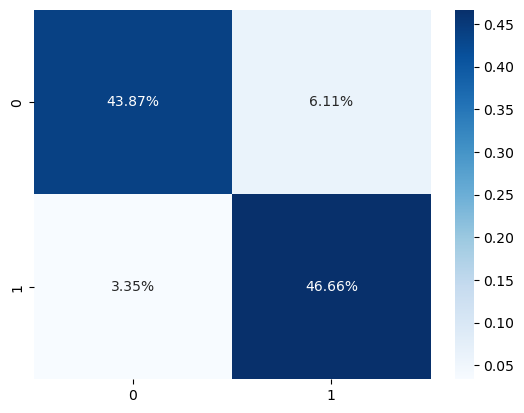

In [65]:
sns.heatmap(cf_matrix_gs/np.sum(cf_matrix_gs), annot=True, #Plotting confusion matrix
            fmt='.2%', cmap='Blues')